## Tarefa II
Faça um codigo na linguagem de programação Python utilizando a metodologia MAP REDUCE com base no arquivo do censo 2022 (Arquivos => MunicipiosSP.csv)  da cidade de São Paulo faça:

a) As  10 cidades com maior nivel de escolaridade de 6 a 14 anos

b)  As 5 cidades com o maior PIB

c)  As 10 cidade com o indicide de maior mortalidade Infantil.

 

obs. Gere um gráfico para cada opção.

In [138]:
import pandas as pd
        
MunicipiosSP = pd.read_csv('MunicipiosSP.csv', sep = ';', encoding='latin1')

In [139]:
print(MunicipiosSP.shape)
print(MunicipiosSP.dtypes)
MunicipiosSP


(650, 13)
Município [-]                                                           object
Código [-]                                                             float64
Gentílico [-]                                                           object
Prefeito [2021]                                                         object
Área Territorial - km² [2022]                                           object
População residente - pessoas [2022]                                   float64
Densidade demográfica - hab/km² [2022]                                  object
Escolarização <span>6 a 14 anos</span> - % [2010]                       object
IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]     object
Mortalidade infantil - óbitos por mil nascidos vivos [2020]             object
Receitas realizadas - R$ (×1000) [2017]                                 object
Despesas empenhadas - R$ (×1000) [2017]                                 object
PIB per capita - R$ [2020]                

,Município [-],Código [-],Gentílico [-],Prefeito [2021],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2020],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2020]
0,Adamantina,3500105.0,adamantinense,MARCIO CARDIM,"411,987",34687.0,"84,19","97,6","0,79","2,61","160718,6793","137083,6699","35788,26"
1,Adolfo,3500204.0,adolfino,IZAEL ANTONIO FERNANDES,"211,055",4351.0,"20,62","98,6","0,73",-,"27333,74731","20103,87713","38464,09"
2,Aguaí,3500303.0,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,"474,554",32072.0,"67,58","95,8","0,715","10,44","84094,76006","72168,73408","31446,28"
3,Águas da Prata,3500402.0,pratense,REGINA HELENA JANIZELO MORAES,"142,673",7369.0,"51,65","98,8","0,781",-,"29390,24814","24363,40149","22718,42"
4,Águas de Lindóia,3500501.0,lindoiense,GILBERTO ABDOU HELOU,"60,126",17930.0,"298,21","96,2","0,745","4,02","86949,22213","75201,47793","26418,38"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pré-processamento

- Limpeza e tratamento dos dados ausentes e conversão de colunas para numérico.


- Crianção de um novo DataFrame para cada indicador para preservar a integridade
 dos dados que são relevantes para cada análise específica.

In [140]:
# replace '-' with NaN
MunicipiosSP = MunicipiosSP.replace('-', pd.NA)

# retirando dados ausentes
MunicipiosSP_pib = MunicipiosSP.dropna(subset=['PIB per capita - R$ [2020]'])
MunicipiosSP_escolarizacao = MunicipiosSP.dropna(subset=['Escolarização <span>6 a 14 anos</span> - % [2010]'])
MunicipiosSP_mortalidade = MunicipiosSP.dropna(subset=['Mortalidade infantil - óbitos por mil nascidos vivos [2020]'])

print(MunicipiosSP_pib.shape)
print(MunicipiosSP_escolarizacao.shape)
print(MunicipiosSP_mortalidade.shape)

(645, 13)
(645, 13)
(455, 13)


In [141]:
# Colunas a serem convertidas para numérico
cols = ['PIB per capita - R$ [2020]', 'Escolarização <span>6 a 14 anos</span> - % [2010]', 'Mortalidade infantil - óbitos por mil nascidos vivos [2020]']

# convertendo coluna PIB per capita - R$ [2020] para numérico
MunicipiosSP_pib.loc[:, cols[0]] = pd.to_numeric(MunicipiosSP_pib[cols[0]].str.replace(',', '.'), errors='coerce')
MunicipiosSP_escolarizacao.loc[:, cols[1]] = pd.to_numeric(MunicipiosSP_escolarizacao[cols[1]].str.replace(',', '.'), errors='coerce')
MunicipiosSP_mortalidade.loc[:, cols[2]] = pd.to_numeric(MunicipiosSP_mortalidade[cols[2]].str.replace(',', '.'), errors='coerce')


### Utilizando a metodologia MAP REDUCE

In [142]:
from functools import reduce
import matplotlib.pyplot as plt


# Função genérica para map
def map_generic(df, columns):
    def mapper(row):
        return row[columns[0]], row[columns[1]]
    return list(map(mapper, df.to_dict(orient='records')))

# Função genérica para reduce
def reduce_generic(data, top_n):
    def reducer(acc, value):
        acc.append(value)
        return sorted(acc, key=lambda x: x[1], reverse=True)[:top_n]
    return reduce(reducer, data, [])

# Função genérica para plotar gráfico

def plot_generic(data, title):
    
    df = pd.DataFrame(data, columns=['Município [-]', title])
    df[title] = pd.to_numeric(df[title], errors='coerce')
    df.plot(kind='bar', x='Município [-]', y=title, figsize=(15, 5))
    plt.title(title)
    plt.show()


[('Barão de Antonina', 100.0), ('Dirce Reis', 100.0), ('Dolcinópolis', 100.0), ('Dourado', 100.0), ('Embaúba', 100.0), ('Mesópolis', 100.0), ('Monções', 100.0), ('Nova Castilho', 100.0), ('Nova Europa', 100.0), ('Novais', 100.0)]


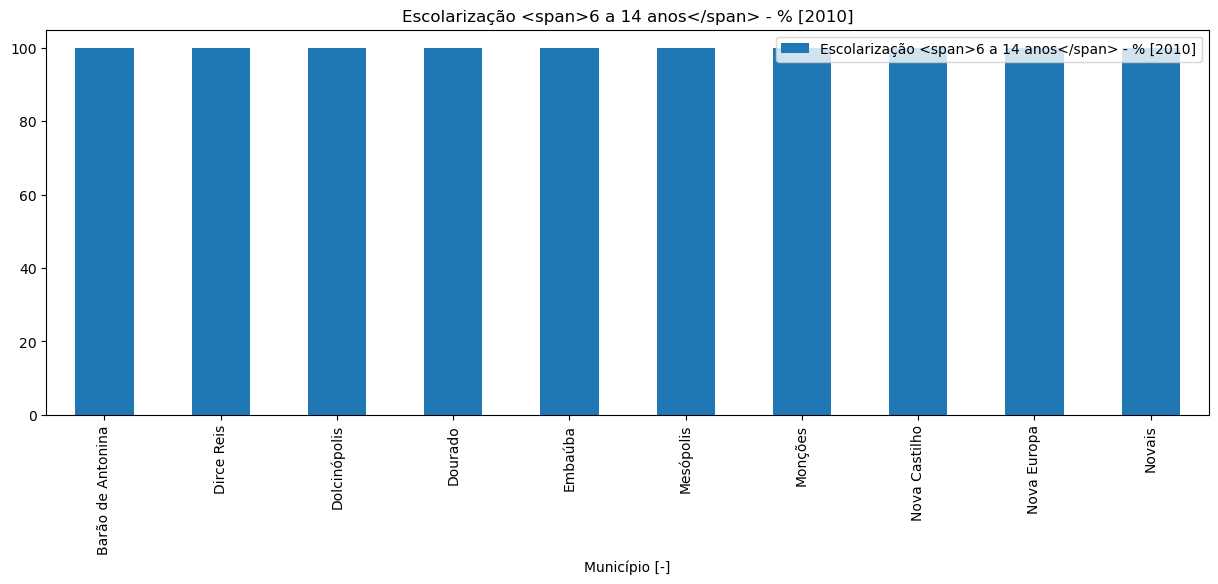

In [143]:
# a) As 10 cidades com maior nivel de escolaridade de 6 a 14 anos
columns = ['Município [-]', 'Escolarização <span>6 a 14 anos</span> - % [2010]'] 
data = map_generic(MunicipiosSP_escolarizacao, columns)
top_n = 10
result = reduce_generic(data, top_n)
print(result)
plot_generic(result, columns[1])

Top 10 cidades com maior nivel de escolaridade de 6 a 14 anos, todos com 100% de escolarização.

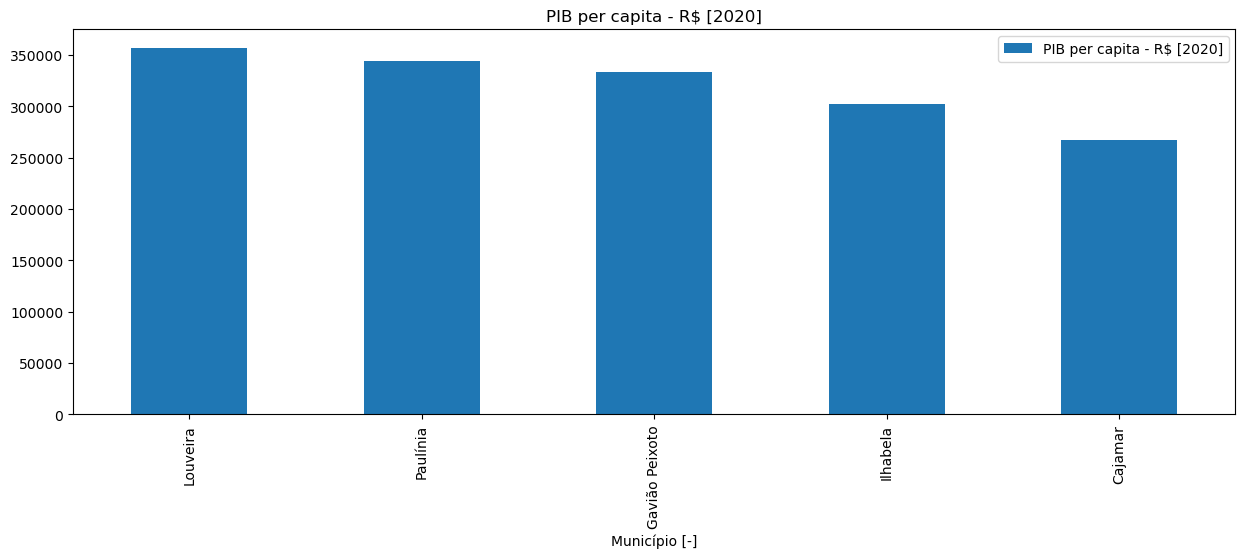

In [144]:
# b) As 5 cidades com o maior PIB
columns = ['Município [-]', 'PIB per capita - R$ [2020]']
data = map_generic(MunicipiosSP_pib, columns)
top_n = 5
result = reduce_generic(data, top_n)
plot_generic(result, columns[1])

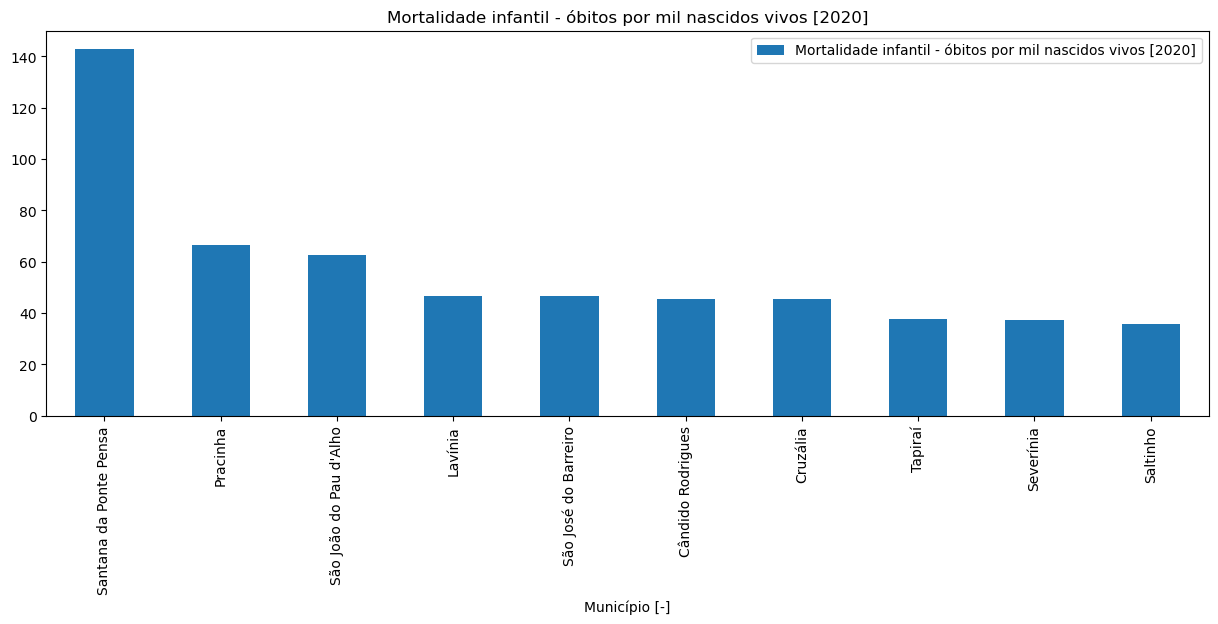

In [145]:
# c) As 10 cidade com o indicide de maior mortalidade Infantil.
columns = ['Município [-]', 'Mortalidade infantil - óbitos por mil nascidos vivos [2020]']
data = map_generic(MunicipiosSP_mortalidade, columns)
top_n = 10
result = reduce_generic(data, top_n)
plot_generic(result, columns[1])    